# Libreria 

In [1]:
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#parsear XML
import csv   
from lxml import etree
#Parsear HTML
import requests
import urllib.request
from bs4 import BeautifulSoup
from urllib.request import urlopen
from bs4.builder import HTMLParserTreeBuilder
#para medir tiempo
from time import time 
import time

# Carga de Archivos XML

In [2]:
org = 'eco'
ORGANISM = org
maxi ='01040'

pathways = requests.get('http://rest.kegg.jp/list/pathway/' + ORGANISM)  #lista de las vias metabolicas y otra informacion porpocionada por KEGG

for line in pathways.text.split('\n'):         # Se recorre la lista propocionada por  KEGG donde se estraen los nombres de las vias de KEGG
      pathwayid = line.split('\t')[0].replace('path:', '') 
      A = pathwayid+'.xml'                     # Le ponemos la extencion .xml para poder cargar los archivos
      if A == str(org)+str(maxi)+'.xml':           
            break
      locals()[str(pathwayid)] = etree.parse(A) # Guarda los  XML com el nombre de la via asignado por KEGG
      locals()[str(pathwayid)] = locals()[str(pathwayid)].getroot()  # Para transformar todos lo XML en directorios de python

## ARMANDO BASE DE DATOS CON PANDAS

##### crear archivo csv para guardar los datos. 

In [3]:
#data= pd.DataFrame(columns=('n', 'enzima', 'gen', 'nob_Keeg', 'path','link')) # Crear tabla csv. 
#data.to_csv('data_'+org+'.csv', sep=';')                              

In [25]:
save=len(pd.read_csv('data_'+org+'.csv',index_col=0, delimiter=';')[['n']].values)
print(save)

1693


In [5]:
save=len(pd.read_csv('data_'+org+'.csv',index_col=0, delimiter=';')[['n']].values)

n=0

for line in pathways.text.split('\n'):
    
    pathwayid = line.split('\t')[0].replace('path:', '') 
    
    if pathwayid ==  str(org)+str(maxi):           
            break
    
    ii=locals()[str(pathwayid)]
    
    
    for i in range(0,len(ii)):
       
        if ii[i].tag=='entry':         
            A=ii[i].attrib            
            if A['type'] == 'gene':
                n=1+n
                
                if n > save:
                    
                    url = A['link']
                
                    response = requests.get(url)
                    soup = BeautifulSoup(response.text, "html.parser")
                    
                    gen    = soup.html.body.div.table.form.td.table.find_all('td')[3].find_all('div')[0].text.replace('\n', ' ').strip().split()[0].replace(',','')
                    
                    if gen == '(RefSeq)':
                        ll=6
                    else:
                        ll=7
                    
                    enzima = soup.html.body.div.table.form.td.table.find_all('td')[ll].text.strip()
                    
                    NewDat = [n , A['id'] , enzima, gen , A['name'].split( )[0] , pathwayid , A['link'] ]
                
                                
                    with open(r'data_'+org+'.csv', 'a' , newline='') as f:
                        writer = csv.writer(f,delimiter=';')
                        writer.writerow(NewDat)
                                              


In [7]:

n=0

for line in pathways.text.split('\n'):
    
    pathwayid = line.split('\t')[0].replace('path:', '') 
    
    if pathwayid == str(org)+str(maxi):           
            break
            
  
    ii=locals()[str(pathwayid)]
    
        
    
    for i in range(0,len(ii)):
       
        if ii[i].tag=='entry':         
            A=ii[i].attrib            
            if A['type'] == 'group':
                n=1+n 
                
                NewDat = [n , A['id'] , 'undefined_Enzima'+pathwayid , 'none' ,  A['name'] , pathwayid , 'no link']
                
                        
                with open(r'data_'+org+'.csv', 'a' , newline='') as f:
                    writer = csv.writer(f , delimiter=';')
                    writer.writerow(NewDat)            
           
                          


Compilando no apagar

In [3]:
data=pd.read_csv('data_'+org+'.csv',index_col=0, sep=';')
data=data[['n' ,'enzima', 'nob_Keeg' ,'path']]
data=data.values
data

array([["'14'", 'fructose-bisphosphate aldolase, class I [EC:4.1.2.13]',
        'eco:b2097', 'eco00010'],
       ['14', 'fructose-bisphosphate aldolase, class I [EC:4.1.2.13]',
        'eco:b2097', 'eco00010'],
       ['46',
        'S-(hydroxymethyl)glutathione dehydrogenase / alcohol dehydrogenase [EC:1.1.1.284 1.1.1.1]',
        'eco:b0356', 'eco00010'],
       ...,
       ['175', 'tRNA Phe', 'eco:b2967', 'eco00970'],
       ['176', 'tRNA Tyr', 'eco:b1230', 'eco00970'],
       ['177', 'tRNA Trp', 'eco:b3761', 'eco00970']], dtype=object)

In [4]:
for line in pathways.text.split('\n'):
    
    pathwayid = line.split('\t')[0].replace('path:', '') 
    
    if pathwayid == str(org)+str(maxi):           
            break
    
    locals()['NODES_'+str(pathwayid)]={}
    
    for i in data:
        if i[3] == pathwayid:
            locals()['NODES_'+str(pathwayid)][i[0]]= i[1] 
            print(i[0],i[1], i[2], i[3])
    

'14' fructose-bisphosphate aldolase, class I [EC:4.1.2.13] eco:b2097 eco00010
14 fructose-bisphosphate aldolase, class I [EC:4.1.2.13] eco:b2097 eco00010
46 S-(hydroxymethyl)glutathione dehydrogenase / alcohol dehydrogenase [EC:1.1.1.284 1.1.1.1] eco:b0356 eco00010
48 pyruvate dehydrogenase E1 component [EC:1.2.4.1] eco:b0114 eco00010
49 pyruvate dehydrogenase E1 component [EC:1.2.4.1] eco:b0114 eco00010
50 pyruvate dehydrogenase E2 component (dihydrolipoamide acetyltransferase) [EC:2.3.1.12] eco:b0115 eco00010
53 pyruvate kinase [EC:2.7.1.40] eco:b1676 eco00010
55 enolase [EC:4.2.1.11] eco:b2779 eco00010
56 2,3-bisphosphoglycerate-dependent phosphoglycerate mutase [EC:5.4.2.11] eco:b0755 eco00010
57 glyceraldehyde 3-phosphate dehydrogenase [EC:1.2.1.12] eco:b1779 eco00010
58 triosephosphate isomerase (TIM) [EC:5.3.1.1] eco:b3919 eco00010
59 6-phosphofructokinase 2 [EC:2.7.1.11] eco:b1723 eco00010
60 fructose-1,6-bisphosphatase II [EC:3.1.3.11] eco:b2930 eco00010
61 glucose PTS system 

103 DNA (cytosine-5)-methyltransferase 1 [EC:2.1.1.37] eco:b1961 eco00270
107 homocysteine S-methyltransferase [EC:2.1.1.10] eco:b0261 eco00270
108 S-ribosylhomocysteine lyase [EC:4.4.1.21] eco:b2687 eco00270
109 adenosylhomocysteine nucleosidase [EC:3.2.2.9] eco:b0159 eco00270
110 cystathionine gamma-synthase [EC:2.5.1.48] eco:b3939 eco00270
132 cysteine synthase [EC:2.5.1.47] eco:b2414 eco00270
133 serine O-acetyltransferase [EC:2.3.1.30] eco:b3607 eco00270
140 S-sulfo-L-cysteine synthase (O-acetyl-L-serine-dependent) [EC:2.5.1.144] eco:b2421 eco00270
149 L-serine dehydratase [EC:4.3.1.17] eco:b1814 eco00270
158 aspartate aminotransferase [EC:2.6.1.1] eco:b0928 eco00270
185 aspartate aminotransferase [EC:2.6.1.1] eco:b0928 eco00270
192 D-cysteine desulfhydrase [EC:4.4.1.15] eco:b1919 eco00270
194 cysteine-S-conjugate beta-lyase [EC:4.4.1.13] eco:b1622 eco00270
198 thiosulfate/3-mercaptopyruvate sulfurtransferase [EC:2.8.1.1 2.8.1.2] eco:b2521 eco00270
199 aspartate aminotransferase [

103 acetyl-CoA synthetase [EC:6.2.1.1] eco:b4069 eco00620
107 acetaldehyde dehydrogenase [EC:1.2.1.10] eco:b0351 eco00620
109 acetyl-CoA C-acetyltransferase [EC:2.3.1.9] eco:b2224 eco00620
110 2-isopropylmalate synthase [EC:2.3.3.13] eco:b0074 eco00620
116 acetyl-CoA carboxylase carboxyl transferase subunit alpha [EC:6.4.1.2 2.1.3.15] eco:b0185 eco00620
122 glyoxylate/hydroxypyruvate reductase [EC:1.1.1.79 1.1.1.81] eco:b1033 eco00620
123 pyruvate dehydrogenase E1 component [EC:1.2.4.1] eco:b0114 eco00620
124 pyruvate dehydrogenase E2 component (dihydrolipoamide acetyltransferase) [EC:2.3.1.12] eco:b0115 eco00620
125 dihydrolipoamide dehydrogenase [EC:1.8.1.4] eco:b0116 eco00620
129 acetate kinase [EC:2.7.2.1] eco:b2296 eco00620
130 acylphosphatase [EC:3.6.1.7] eco:b0968 eco00620
137 phosphotransacetylase eco:b2458 eco00620
168 D-lactate dehydratase / protein deglycase [EC:4.2.1.130 3.5.1.124] eco:b1967 eco00620
174 fumarate hydratase, class II [EC:4.2.1.2] eco:b1611 eco00620
175 fumar

In [9]:
NODES_eco00010

{"'14'": 'fructose-bisphosphate aldolase, class I [EC:4.1.2.13]',
 '14': 'fructose-bisphosphate aldolase, class I [EC:4.1.2.13]',
 '46': 'S-(hydroxymethyl)glutathione dehydrogenase / alcohol dehydrogenase [EC:1.1.1.284 1.1.1.1]',
 '48': 'pyruvate dehydrogenase E1 component [EC:1.2.4.1]',
 '49': 'pyruvate dehydrogenase E1 component [EC:1.2.4.1]',
 '50': 'pyruvate dehydrogenase E2 component (dihydrolipoamide acetyltransferase) [EC:2.3.1.12]',
 '53': 'pyruvate kinase [EC:2.7.1.40]',
 '55': 'enolase [EC:4.2.1.11]',
 '56': '2,3-bisphosphoglycerate-dependent phosphoglycerate mutase [EC:5.4.2.11]',
 '57': 'glyceraldehyde 3-phosphate dehydrogenase [EC:1.2.1.12]',
 '58': 'triosephosphate isomerase (TIM) [EC:5.3.1.1]',
 '59': '6-phosphofructokinase 2 [EC:2.7.1.11]',
 '60': 'fructose-1,6-bisphosphatase II [EC:3.1.3.11]',
 '61': 'glucose PTS system EIICB or EIICBA component [EC:2.7.1.199]',
 '62': 'glucose-6-phosphate isomerase [EC:5.3.1.9]',
 '63': 'phosphoglucomutase [EC:5.4.2.2]',
 '64': 'gluco

## PRIMERA RED

In [7]:
EDGES=[]

for line in pathways.text.split('\n'):        
    pathwayid = line.split('\t')[0].replace('path:', '') 
    
    if pathwayid == str(org)+str(maxi):           
            break
            
    ii=locals()[str(pathwayid)]
    
     
    NODES=locals()['NODES_'+str(pathwayid)]
    
    for i in range(0,len(ii)):
        if ii[i].tag=='relation':         
            A=ii[i].attrib            
            if A['type'] == 'ECrel':    #relación enzima-enzima, que indica dos enzimas que catalizan pasos de reacción sucesivos
               
                EDGES.append( [  NODES[ A['entry1'] ] , NODES[ A['entry2'] ]  ]  ) 

print(EDGES)                

[['glucokinase [EC:2.7.1.2]', 'glucose-1-phosphatase [EC:3.1.3.10]'], ['aldose 1-epimerase [EC:5.1.3.3]', 'glucokinase [EC:2.7.1.2]'], ['aldose 1-epimerase [EC:5.1.3.3]', 'glucose-1-phosphatase [EC:3.1.3.10]'], ['glucokinase [EC:2.7.1.2]', 'aldose 1-epimerase [EC:5.1.3.3]'], ['glucokinase [EC:2.7.1.2]', '6-phospho-beta-glucosidase [EC:3.2.1.86]'], ['glucokinase [EC:2.7.1.2]', '6-phospho-beta-glucosidase [EC:3.2.1.86]'], ['glucose-6-phosphate isomerase [EC:5.3.1.9]', 'glucokinase [EC:2.7.1.2]'], ['glucokinase [EC:2.7.1.2]', 'glucose-6-phosphate 1-epimerase [EC:5.1.3.15]'], ['glucose-6-phosphate isomerase [EC:5.3.1.9]', '6-phospho-beta-glucosidase [EC:3.2.1.86]'], ['glucose-6-phosphate 1-epimerase [EC:5.1.3.15]', '6-phospho-beta-glucosidase [EC:3.2.1.86]'], ['glucose-6-phosphate isomerase [EC:5.3.1.9]', '6-phospho-beta-glucosidase [EC:3.2.1.86]'], ['glucose-6-phosphate 1-epimerase [EC:5.1.3.15]', '6-phospho-beta-glucosidase [EC:3.2.1.86]'], ['glucose-6-phosphate isomerase [EC:5.3.1.9]', 

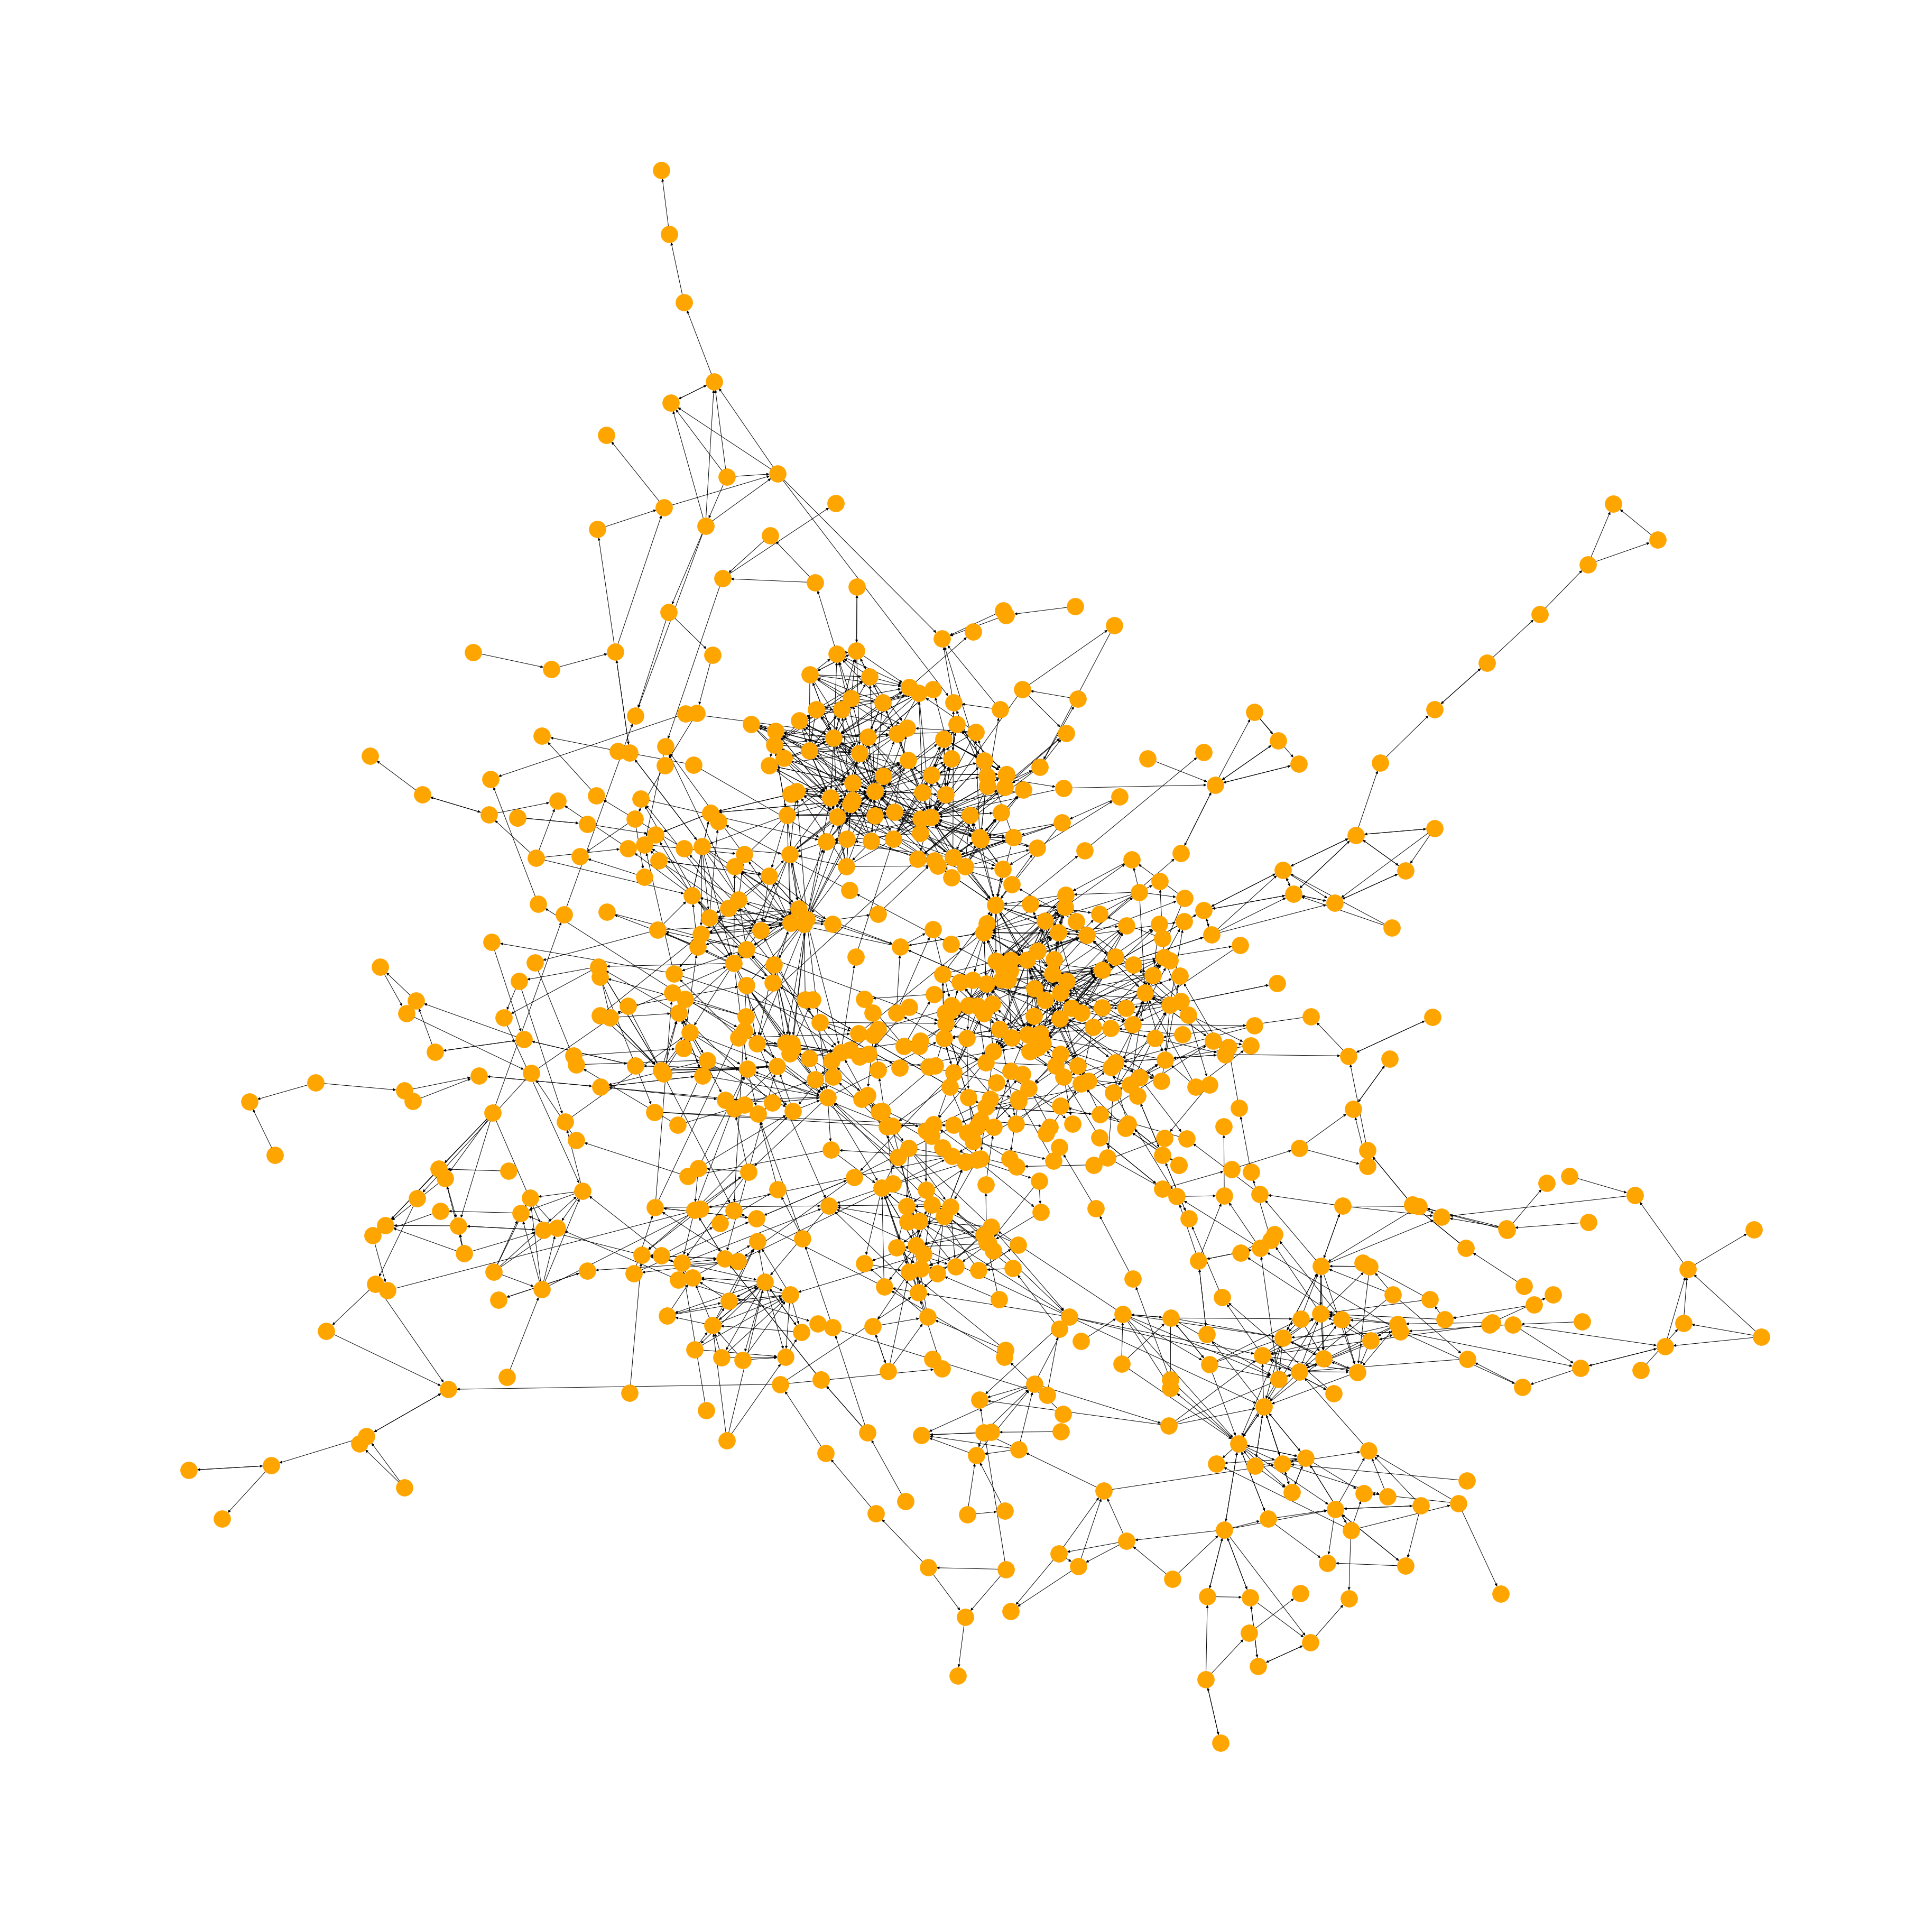

In [8]:
G = nx.DiGraph() #--->DiGrafo para hacer un grado dirigido 
 
G.add_edges_from(EDGES)


plt.figure(3,figsize=(50,50))
#nx.draw_kamada_kawai(G,font_size=15,node_size=1000,node_color='orange')
nx.draw_kamada_kawai(G,font_size=15,node_size=1000,node_color='orange',with_labels=False)
plt.savefig("net_eco_p0.pdf")# Guardar la red en pdf. 
plt.show()

In [10]:
g=nx.number_of_nodes(G)
print('g=',g)
L=nx.number_of_edges(G)
print('L=',L)

g= 682
L= 1811


# Analisis

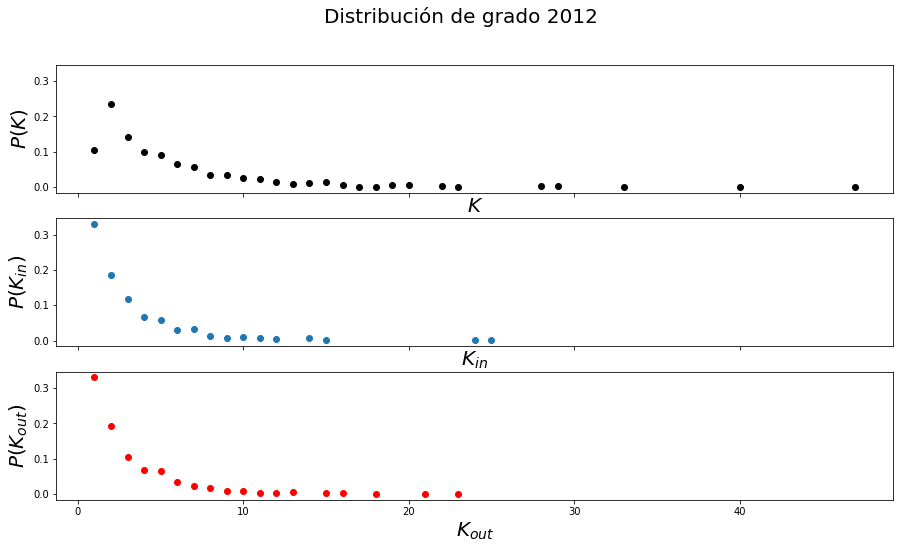

In [14]:
nodos=G.nodes

D=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=nx.degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D.append(d[i])
    

D_in=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=G.in_degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D_in.append(d[i])
    
    
D_out=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=G.out_degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D_out.append(d[i])
    
    
P=[]
X=[]
for i in range(1,max(D)+1):
    if D.count(i) != 0: 
        P.append(D.count(i)/len(D))
        X.append(i)
        
P_in=[]
X_in=[]
for i in range(1,max(D_in)+1):
    if D_in.count(i) != 0: 
        P_in.append(D_in.count(i)/len(D_in))
        X_in.append(i)  

P_out=[]
X_out=[]
for i in range(1,max(D)+1):
    if D_out.count(i) != 0: 
        P_out.append(D_out.count(i)/len(D_out))
        X_out.append(i)
        
        
        
# GRAFICA DE LA PROVAVILIDAD VS EL NUMERO DE GRADO        
fig, axs = plt.subplots( 3 ,sharex = True, sharey = True, figsize=(15,8))

fig.suptitle('Distribución de grado 2012',fontsize=20)
axs[0].plot(X,P,'ko')         
axs[0].set_xlabel(r'$K$',fontsize=20)
axs[0].set_ylabel(r'$P(K)$',fontsize=20)

axs[1].plot(X_in,P_in,'o')         
axs[1].set_xlabel(r'$K_{in}$',fontsize=20)
axs[1].set_ylabel(r'$P(K_{in})$',fontsize=20)

axs[2].plot(X_out,P_out, 'ro')         
axs[2].set_xlabel(r'$K_{out}$',fontsize=20)
axs[2].set_ylabel(r'$P(K_{out})$',fontsize=20)

#plt.savefig("P_vs_k_2012.pdf")# Guardar la red en pdf.    

plt.show()

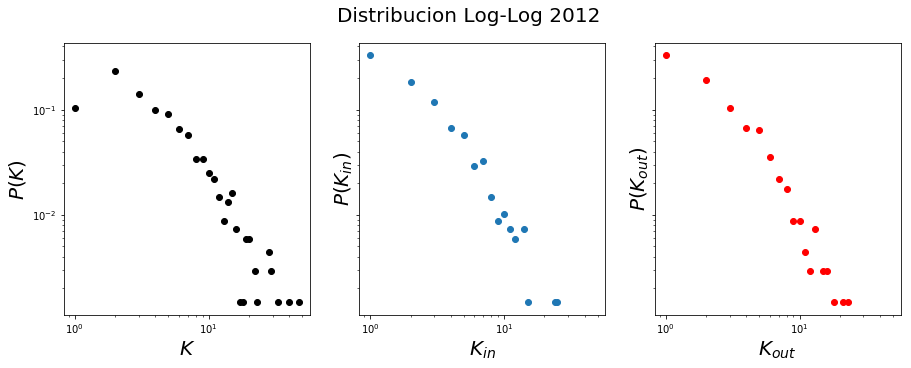

In [15]:

fig, (ax1, ax2 , ax3) = plt.subplots(1, 3 ,sharex = True, sharey = True, figsize=(15,5))
fig.suptitle('Distribucion Log-Log 2012',fontsize=20)
ax1.plot(X,P,'ko')
ax1.set_xlabel(r'$K$',fontsize=20)
ax1.set_ylabel(r'$P(K)$',fontsize=20)

ax2.plot(X_in,P_in,'o')
ax2.set_xlabel(r'$K_{in}$',fontsize=20)
ax2.set_ylabel(r'$P(K_{in})$',fontsize=20)

ax3.plot(X_out,P_out,'ro')
ax3.set_xlabel(r'$K_{out}$',fontsize=20)
ax3.set_ylabel(r'$P(K_{out})$',fontsize=20)

# Escala log-log
plt.xscale('log') 
plt.yscale('log') 

#plt.savefig("Ley_de_potencias_2012.pdf")# Guardar la red en pdf.

plt.show()

In [16]:
d=G.degree(G) #Vector con el par ordenado de numero de aristas de entrada a cada uno de los nodos
d_in=G.in_degree(G)
d_out=G.out_degree(G)
degre=[]

for i in G.nodes:
    degre.append([i,d[i],d_in[i],d_out[i], d_in[i]-d_out[i] ])
df=pd.DataFrame(degre,columns=['Nombre', 'grado', 'grado_in', 'grado_out','dif_grado'])
df.sort_values(by='dif_grado', ascending=False)


,Nombre,grado,grado_in,grado_out,dif_grado
219,nucleoside triphosphate diphosphatase [EC:3.6....,40,25,15,10
251,5'-deoxynucleotidase [EC:3.1.3.89],9,9,0,9
160,aspartate aminotransferase [EC:2.6.1.1],19,14,5,9
16,pyruvate dehydrogenase E1 component [EC:1.2.4.1],19,14,5,9
17,pyruvate dehydrogenase E2 component (dihydroli...,16,12,4,8
123,acetyl-CoA carboxylase carboxyl transferase su...,14,11,3,8
184,hypoxanthine phosphoribosyltransferase [EC:2.4...,20,14,6,8
506,L-lactate dehydrogenase (cytochrome) [EC:1.1.2.3],11,9,2,7
507,pyruvate dehydrogenase (quinone) [EC:1.2.5.1],15,11,4,7
261,L-aspartate oxidase [EC:1.4.3.16],9,8,1,7


In [17]:
intr=nx.betweenness_centrality(G) #dicionario en python
intr = pd.DataFrame([[key, intr[key]] for key in intr.keys()], columns=['Name', 'intermediacion'])
print(intr.sort_values(by='intermediacion', ascending=False))

                                                  Name  intermediacion
160            aspartate aminotransferase [EC:2.6.1.1]        0.086678
19                       pyruvate kinase [EC:2.7.1.40]        0.066692
29                  malate dehydrogenase [EC:1.1.1.37]        0.064229
185  5'-nucleotidase / UDP-sugar diphosphatase [EC:...        0.038782
219  nucleoside triphosphate diphosphatase [EC:3.6....        0.037578
24   2,3-bisphosphoglycerate-independent phosphogly...        0.036338
13                phosphoglycerate kinase [EC:2.7.2.3]        0.035643
509                       malate synthase [EC:2.3.3.9]        0.035577
269      glycine hydroxymethyltransferase [EC:2.1.2.1]        0.034162
10   fructose-bisphosphate aldolase, class I [EC:4....        0.033716
12   glyceraldehyde 3-phosphate dehydrogenase [EC:1...        0.033318
18         dihydrolipoamide dehydrogenase [EC:1.8.1.4]        0.031567
293      cysteine-S-conjugate beta-lyase [EC:4.4.1.13]        0.030455
21   p